<a href="https://colab.research.google.com/github/hrithikpurwar/ML/blob/main/D_Reduction(Kernel_PCA)(Non_Linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We can apply linear classifier to even a non linearly seperable classes by applying kernel PCA on X before applying linear classification. It will transform the dataset like that.

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv',sep=',')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
df.drop(['User ID'], axis=1, inplace=True)

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0


In [7]:
df.shape

(400, 4)

In [8]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.dtypes

Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

In [10]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [11]:
X

,Gender,Age,EstimatedSalary
0,Male,19.0,19000.0
1,Male,35.0,20000.0
2,Female,26.0,43000.0
3,Female,27.0,57000.0
4,Male,19.0,76000.0
...,...,...,...
395,Female,46.0,41000.0
396,Male,51.0,23000.0
397,Female,50.0,20000.0
398,Male,36.0,33000.0


In [16]:
X=pd.get_dummies(X,drop_first=True)

In [17]:
X

,Age,EstimatedSalary,Gender_Male
0,19.0,19000.0,1
1,35.0,20000.0,1
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,1
...,...,...,...
395,46.0,41000.0,0
396,51.0,23000.0,1
397,50.0,20000.0,0
398,36.0,33000.0,1


In [12]:
Y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [19]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(280, 3)
(280, 1)
(120, 3)
(120, 1)


In [20]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [21]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel='rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [22]:
X_train

array([[ 2.36897469e-01, -3.26520366e-01],
       [ 3.61903513e-02,  3.65358678e-01],
       [-4.29737512e-01,  3.40053150e-01],
       [ 3.49405468e-01,  3.16465169e-01],
       [-5.01320861e-01, -4.01135207e-02],
       [ 5.94761072e-01, -1.71421284e-01],
       [ 3.61428340e-01,  1.71175982e-01],
       [-2.98099461e-01,  5.96512712e-01],
       [-4.25020453e-01,  3.47549877e-01],
       [ 5.49068992e-02,  2.11039114e-01],
       [-3.02632059e-01, -4.67602085e-01],
       [ 8.15585629e-02,  2.70250088e-01],
       [ 2.26586520e-01, -3.38669719e-01],
       [ 4.30960244e-02,  3.59555000e-01],
       [-4.50858475e-01,  4.72205388e-01],
       [ 4.87798544e-01, -3.31731808e-01],
       [ 4.47503526e-01,  2.29633705e-01],
       [ 4.20072594e-01, -1.08464879e-01],
       [ 5.55191128e-01,  1.23975941e-01],
       [ 3.42828006e-01,  5.00263990e-02],
       [-5.33146866e-01, -3.17772332e-01],
       [-3.24899069e-01, -3.30777466e-01],
       [ 5.38942862e-01, -1.77305338e-01],
       [ 5.

In [23]:
X_test

array([[ 0.46798478, -0.08866164],
       [-0.51374851, -0.24540349],
       [ 0.57846337, -0.05716504],
       [-0.49394642, -0.30271146],
       [-0.51372778, -0.37611449],
       [ 0.28521335, -0.34891086],
       [-0.3331972 , -0.42523896],
       [ 0.0866881 ,  0.30898601],
       [-0.30608114, -0.39924726],
       [ 0.39446973,  0.15436328],
       [ 0.50602474, -0.34423442],
       [-0.4705918 , -0.5463408 ],
       [ 0.59052384, -0.12607357],
       [ 0.56240895,  0.0922221 ],
       [ 0.24042852, -0.17129797],
       [-0.37343793,  0.18344221],
       [ 0.57335923,  0.02459905],
       [ 0.21829904, -0.17105225],
       [-0.24981571,  0.570329  ],
       [ 0.38818464, -0.24048793],
       [-0.50379162, -0.38712094],
       [-0.2638712 ,  0.55583573],
       [-0.50307362, -0.09862497],
       [ 0.26056165,  0.42700383],
       [-0.32700689, -0.53198982],
       [-0.26477711,  0.57280042],
       [-0.44841064, -0.25252028],
       [ 0.482107  , -0.16878032],
       [-0.54249431,

In [24]:
from sklearn.svm import SVC
classifier1=SVC(kernel='rbf')
classifier1.fit(X_train,Y_train)
Y_pred1=classifier1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(Y_test,Y_pred1) #1 incorrect prediction 5+6=11 

[[73  6]
 [ 5 36]]


In [26]:
from sklearn.svm import SVC
classifier1=SVC(kernel='linear')
classifier1.fit(X_train,Y_train)
Y_pred1=classifier1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(Y_test,Y_pred1) #1 incorrect prediction 5+6=11 

In [29]:
cn

array([[72,  7],
       [ 7, 34]])

IndexError: ignored

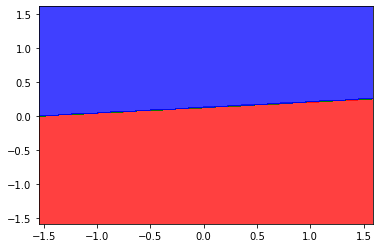

In [30]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0], X_set[Y_set==j,1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [31]:
 from sklearn.metrics import accuracy_score
 score=accuracy_score(Y_test, Y_pred1)*100
 print('accuracy=',score,'%')

accuracy= 88.33333333333333 %
